# Rtn4: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Rtn4'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30505332,C57BL/6N,m,control,wt (Rtn4),24.9,85.54,53.13,2.65,1.34
1,30505333,C57BL/6N,m,control,wt (Rtn4),27.3,81.15,48.65,3.23,1.69


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30505333,Rtn4_2vX_16.dcm,3.244186,0.048333,1.552326,0.087500,433.734940,0.048333,0.999999,high,0.999999,high,42.346154,6.625120,84.354848,52.150538,C57BL/6N,m,control,wt (Rtn4),27.3,81.15,48.65,3.23,1.69,0.014186,3.237093,-0.137674,1.621163,3.204848,3.500538
1,30505333,Rtn4_2vX_16.dcm,3.104651,0.186667,1.622093,0.220833,480.000000,0.186667,0.999999,high,0.999999,high,38.054557,7.428022,80.480597,47.752809,C57BL/6N,m,control,wt (Rtn4),27.3,81.15,48.65,3.23,1.69,-0.125349,3.167326,-0.067907,1.656047,-0.669403,-0.897191
2,30505333,Rtn4_2vX_16.dcm,3.540698,0.311667,1.831395,0.355833,500.000000,0.311667,0.999998,high,0.999998,high,52.303063,10.161569,80.571752,48.275862,C57BL/6N,m,control,wt (Rtn4),27.3,81.15,48.65,3.23,1.69,0.310698,3.385349,0.141395,1.760698,-0.578248,-0.374138
3,30505333,Rtn4_2vX_16.dcm,3.174419,0.431667,1.674419,0.468333,576.000000,0.431667,0.999998,high,0.999998,high,40.169003,8.065374,79.921398,47.252747,C57BL/6N,m,control,wt (Rtn4),27.3,81.15,48.65,3.23,1.69,-0.055581,3.202209,-0.015581,1.682209,-1.228602,-1.397253
4,30505333,Rtn4_2vX_16.dcm,3.348837,0.535833,1.622093,0.585000,533.333333,0.535833,0.999999,high,0.999999,high,45.729888,7.428022,83.756745,51.562500,C57BL/6N,m,control,wt (Rtn4),27.3,81.15,48.65,3.23,1.69,0.118837,3.289419,-0.067907,1.656047,2.606745,2.912500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,30505332,Rtn4_2vX_19.dcm,2.441860,4.266667,1.639535,4.140000,734.693878,4.266667,0.999829,high,0.999829,high,21.049816,7.637103,63.718907,32.857143,C57BL/6N,m,control,wt (Rtn4),24.9,85.54,53.13,2.65,1.34,-0.208140,2.545930,0.299535,1.489767,-21.821093,-20.272857
228,30505332,Rtn4_2vX_19.dcm,3.000000,4.348333,1.098837,4.218333,705.882353,4.348333,0.999829,high,0.999829,high,35.000000,2.654449,92.415860,63.372093,C57BL/6N,m,control,wt (Rtn4),24.9,85.54,53.13,2.65,1.34,0.350000,2.825000,-0.241163,1.219419,6.875860,10.242093
229,30505332,Rtn4_2vX_19.dcm,2.790698,4.433333,1.081395,4.299167,720.000000,4.433333,0.995397,high,0.999829,high,29.309653,2.542718,91.324640,61.250000,C57BL/6N,m,control,wt (Rtn4),24.9,85.54,53.13,2.65,1.34,0.140698,2.720349,-0.258605,1.210698,5.784640,8.120000
230,30505332,Rtn4_2vX_19.dcm,2.406977,4.516667,1.029070,4.385000,642.857143,4.516667,0.995397,high,0.995397,high,20.306810,2.224622,89.044947,57.246377,C57BL/6N,m,control,wt (Rtn4),24.9,85.54,53.13,2.65,1.34,-0.243023,2.528488,-0.310930,1.184535,3.504947,4.116377


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

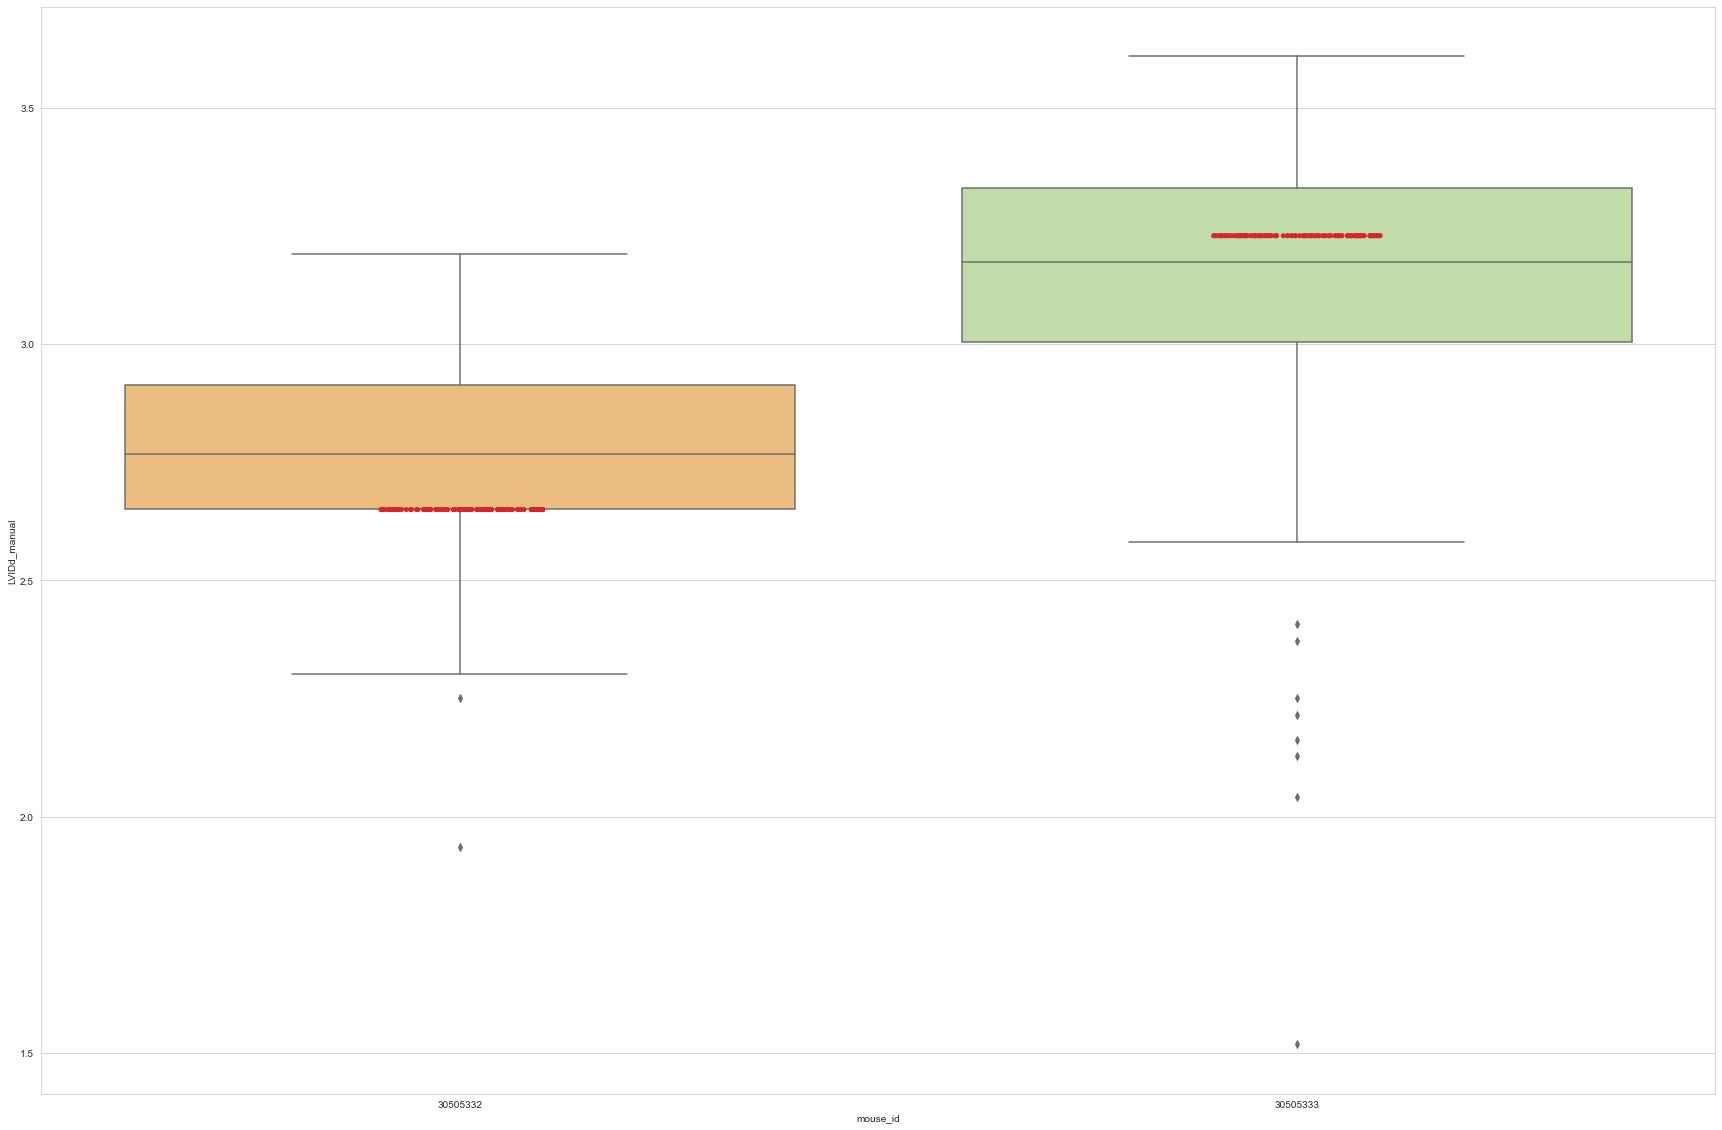

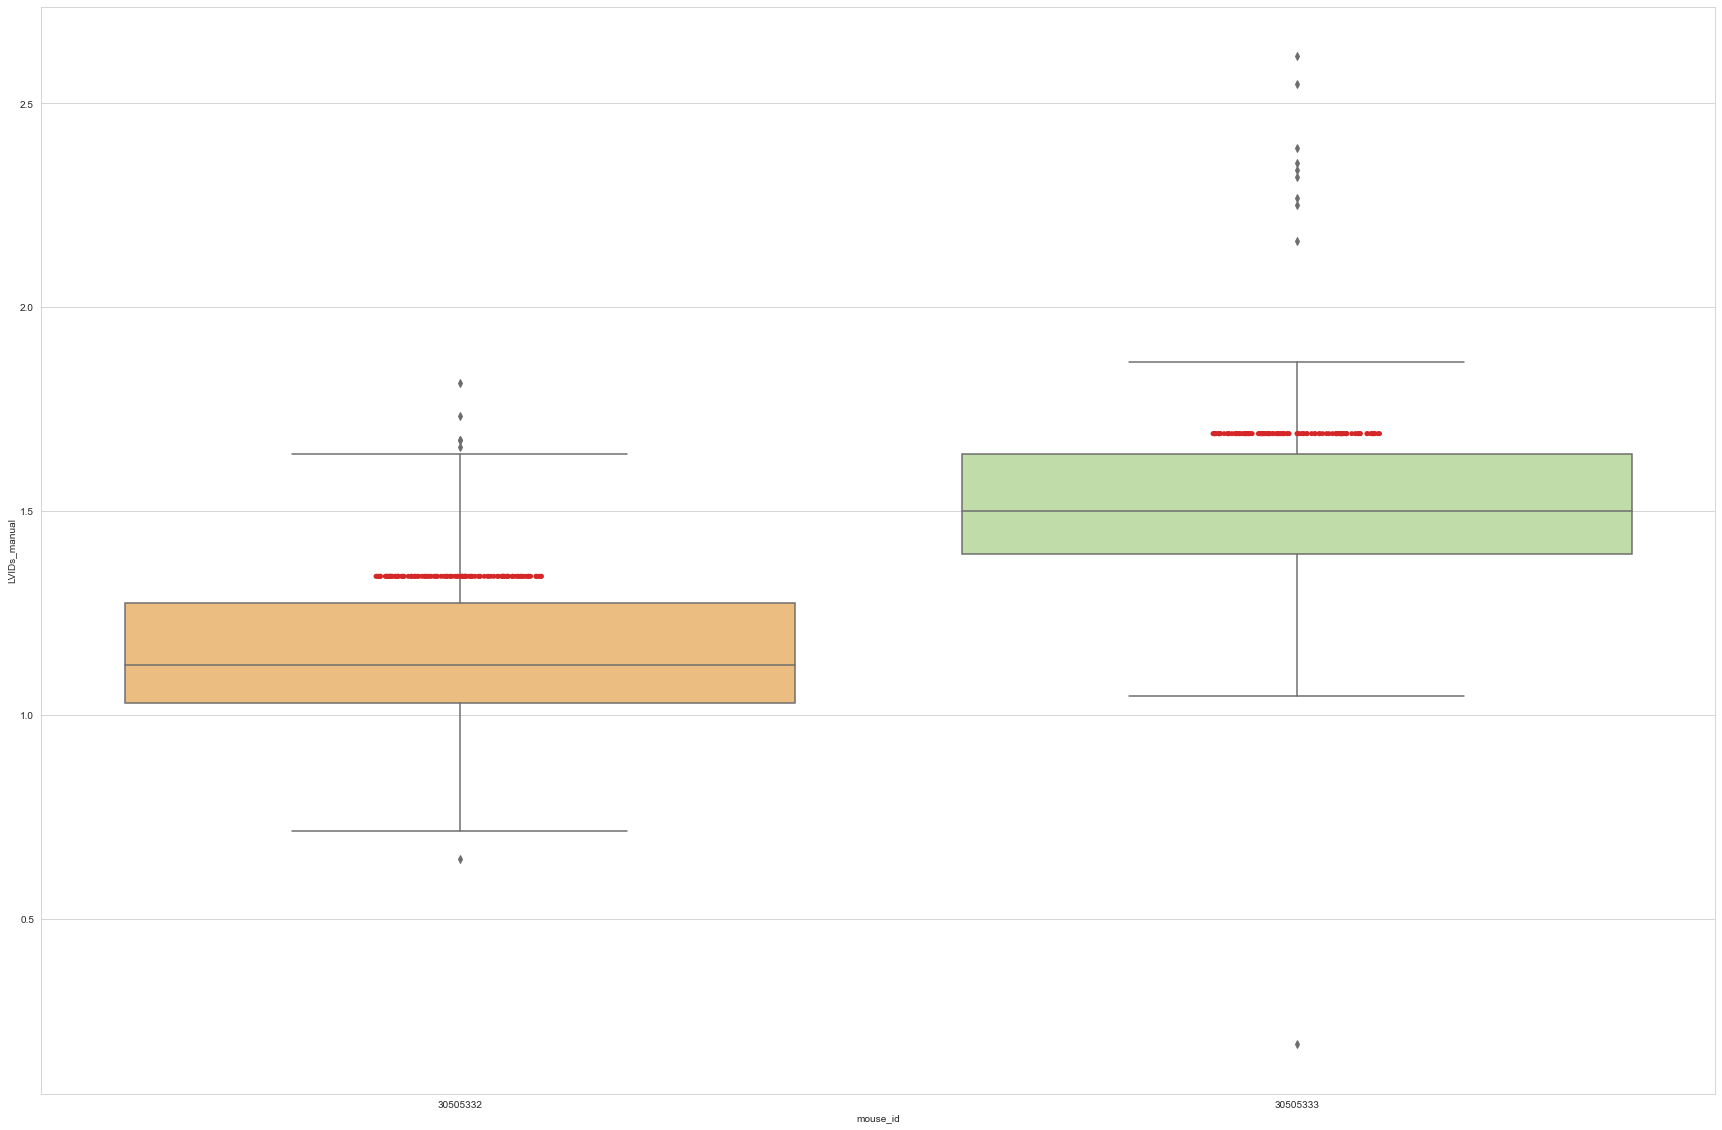

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

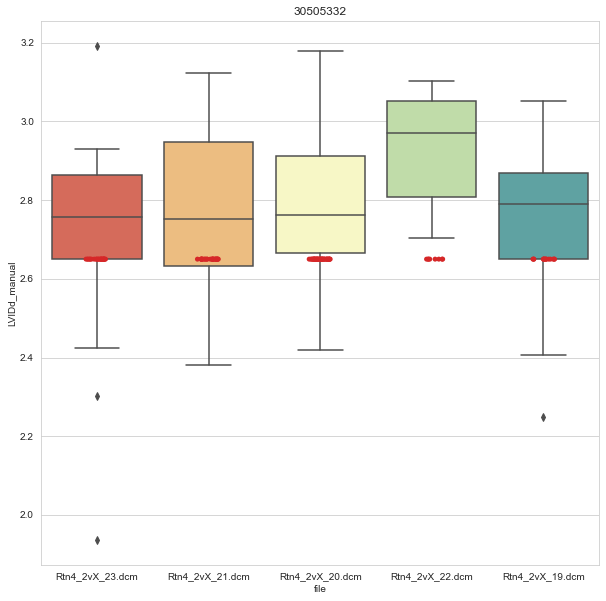

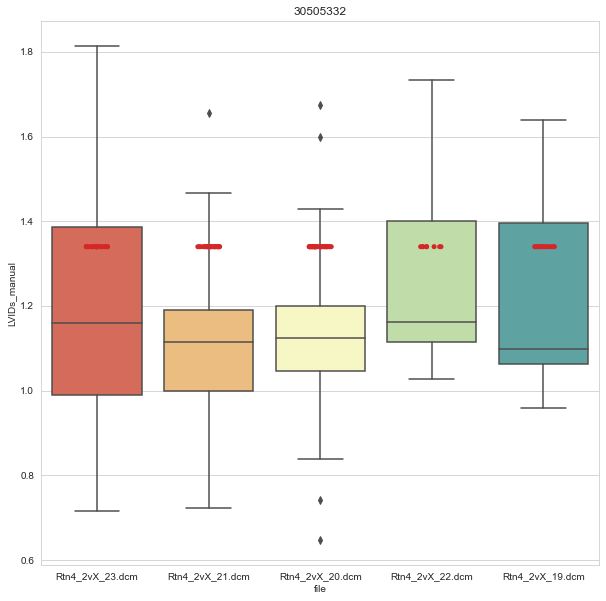

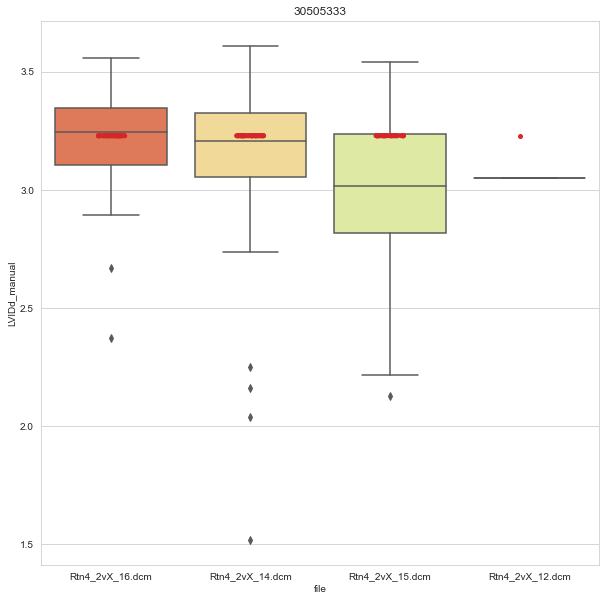

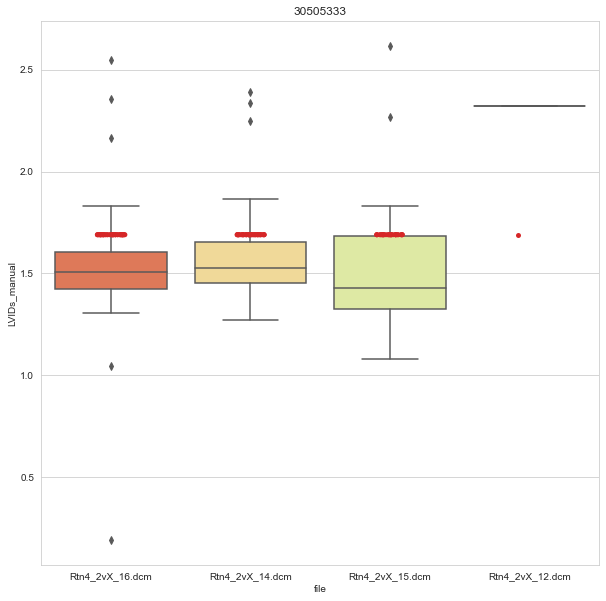

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
1771,30505332,Rtn4_2vX_19,31.762892,68.237108
1772,30505332,Rtn4_2vX_21,47.070915,52.929085
1773,30505332,Rtn4_2vX_22,15.313464,84.686536
1774,30505332,Rtn4_2vX_20,73.530923,26.469077
1775,30505332,Rtn4_2vX_23,47.070915,52.929085
1776,30505333,Rtn4_2vX_14,94.707091,5.292909
1777,30505333,Rtn4_2vX_15,73.530923,26.469077
1778,30505333,Rtn4_2vX_16,100.000000,0.000000
1779,30505333,Rtn4_2vX_12,15.298955,84.701045


### Image quality per mouse

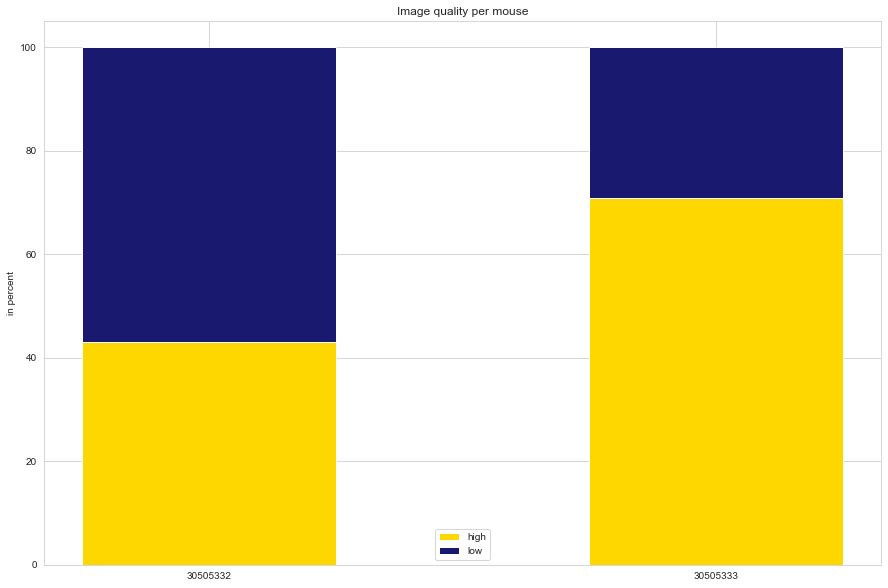

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Rtn4,55.37,44.63


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,232.00,232.00,232.00,232.00
mean,-0.00,-0.16,0.67,2.68
std,0.31,0.27,11.92,10.80
min,-1.71,-1.50,-70.19,-44.07
25%,-0.14,-0.29,-0.14,-0.36
50%,0.04,-0.19,3.69,4.22
75%,0.17,-0.05,6.45,8.79
max,0.54,0.93,18.80,45.20
number of mice,2.00,2.00,2.00,2.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,0,0
m,2,2


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')